## COVID-19 Analysis

### data source

https://github.com/CSSEGISandData/COVID-19

Todo:
- Get data from online source (remove need to pull repo)
- Aggregate per country (right now US is Washington only)
- Remove artifacts of bi-daily reporting from gradient
- Expand charts to 20 top locations
- Adopt log scale

In [226]:
# data files
data_folder = "../../COVID-19/csse_covid_19_data/csse_covid_19_time_series"
data_file = data_folder + "/" + "time_series_19-covid-Deaths.csv"

In [227]:
import pandas as pd
import numpy as np

df = pd.read_csv(data_file)


In [228]:
# latest leaders

last_cols = np.concatenate((df.columns[0:2], df.columns[-17:]))
last_df = df[last_cols].sort_values(by=[last_cols[-1:][0]], ascending=False).transpose()
last_df = last_df[last_df.columns[:10]]
last_df

,16,154,155,18,157,403,440,156,98,11
Province/State,NaN,Hubei,NaN,NaN,France,United Kingdom,Netherlands,NaN,Washington,NaN
Country/Region,Italy,China,Iran,Spain,France,United Kingdom,Netherlands,"Korea, South",US,Germany
3/4/20,107,2871,92,2,4,0,0,35,0,0
3/5/20,148,2902,107,3,6,1,0,35,0,0
3/6/20,197,2931,124,5,9,2,1,42,0,0
3/7/20,233,2959,145,10,11,2,1,44,0,0
3/8/20,366,2986,194,17,19,3,3,50,0,0
3/9/20,463,3008,237,28,19,4,3,53,0,2
3/10/20,631,3024,291,35,33,6,4,54,23,2
3/11/20,827,3046,354,54,48,8,5,60,29,3


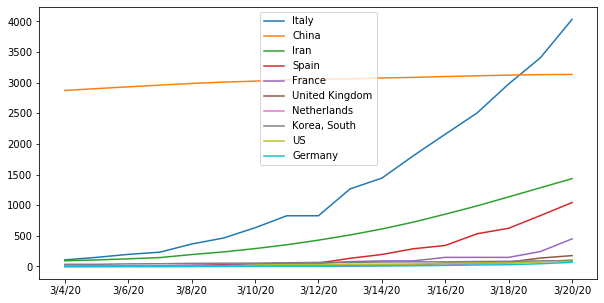

In [229]:
from matplotlib.pyplot import *

labels = last_df[1:2].values[0]
ax = last_df.tail(-2).plot(figsize=(10,5))
ax.legend(labels);


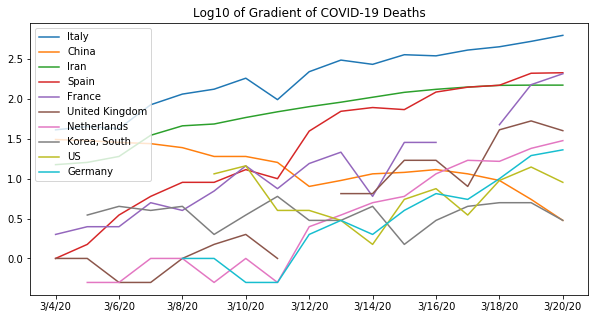

In [230]:
# plot log of gradient
grad_df = last_df.tail(-2).apply(np.gradient)
grad_df = grad_df.apply(np.log10)
ax = grad_df.plot(figsize=(10,5), title='Log10 of Gradient of COVID-19 Deaths')
ax.legend(labels);
